In [191]:
import numpy as np
import random
import networkx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
from gensim.models import Word2Vec

In [192]:
def get_edge_probability(G,start,end,p,q):
    unnormalized_probability=[]
    for end_neighbors in sorted(G.neighbors(end)):
        if end_neighbors==start:
            unnormalized_probability.append(1/p)
        elif G.has_edge(end_neighbors,start):
            unnormalized_probability.append(1)
        else:
            unnormalized_probability.append(1/q)
    normalized_probability=[float(x)/sum(unnormalized_probability) for x in unnormalized_probability]
    return normalized_probability

In [193]:
def getAlledgesProbability(G,p,q, undirected=True):
    AlledgesProbability={}
    for edge in G.edges():
        AlledgesProbability[edge]=get_edge_probability(G,edge[0],edge[1],p,q)
        if undirected:
            AlledgesProbability[(edge[1],edge[0])]=get_egde_probability(G,edge[1],edge[0],p,q)
    return AlledgesProbability
    

In [194]:
def random_walk(G,walk_length,start_point,p,q):
    AlledgesProbability=getAlledgesProbability(G,p,q)
    walk=[start_point]
    while len(walk) <walk_length:
        current=walk[-1]
        neighbors=sorted(G.neighbors(current))
        if len(neighbors)>0:
            if len(walk)==1:
                next=np.random.choice(neighbors,size=1,p=[1/len(neighbors)]*len(neighbors))[0]
                walk.append(next)
            else:
                previous=walk[-2]
                next=np.random.choice(neighbors,size=1,p=AlledgesProbability[(previous, current)])[0]
                walk.append(next)
        else:
            break
    return walk 
    

In [195]:
def simulate_walk(G, number_walk, walk_length,p,q):
    walk=[]
    nodes=list(G.nodes())
    for i in range(number_walk):
        random.shuffle(nodes)
        for node in nodes:
            walk.append(random_walk(G,walk_length, node, p,q))
    return walk
        

In [196]:
G=networkx.karate_club_graph()

### 什么是networkx
##### https://zhuanlan.zhihu.com/p/33616557
##### https://zhuanlan.zhihu.com/p/41429668
##### https://zhuanlan.zhihu.com/p/35508394

In [197]:
def clustering(H):
    edges= networkx.edge_betweenness_centrality(H,normalized=True)
    mx=max(edges.values())
    for i in sorted(edges.keys()):
        if edges[i]==mx:
            return i 
        
        
    

In [198]:
split=list(networkx.algorithms.community.centrality.girvan_newman(G, most_valuable_edge=clustering))

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


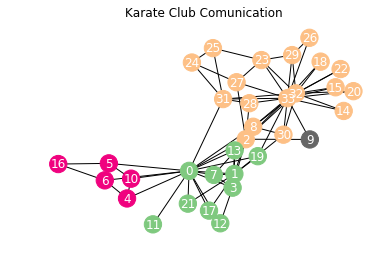

In [199]:
split_number=2##times?
color_map={}
for i in range(len(split[2])):
    for node in list(split[2][i]):
        color_map[node]=i/len(split[2])
values=[color_map.get(node,0.25) for node in G.node]
plt.title('Karate Club Comunication ')
networkx.draw(G,cmap=plt.get_cmap('Accent'),node_color=values,with_labels=True,font_color='white')
plt.show()

In [220]:
walks=simulate_walk(G, number_walk=128, walk_length=15, p=1, q=2)

In [221]:
walks_str=[list(map(str,walk))for walk in walks]

In [222]:
model=Word2Vec(walks_str,size=2,window=10,iter=1)

In [223]:
vocab=model.wv.vocab ###word2Vec 获取训练好后所有的词
embedding=np.array([model.wv[x] for x in vocab])
label=[a for a in vocab]
colors=[color_map[int(a)] for a in vocab]

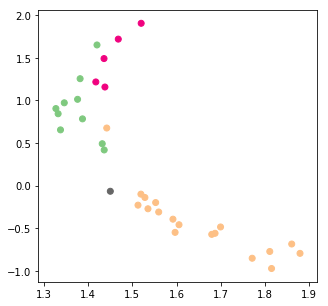

In [224]:
figure=plt.figure(figsize=(5,5))
ax=figure.add_subplot(111)
ax.scatter(embedding[:, 0], embedding[:, 1], cmap='Accent', c=colors)
plt.show()